<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-star.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
matplotlib.rcParams['font.size'] = 12

import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [3]:
toiid=1063

#initialize
star = cr.Star(toiid=toiid)

Target: TOI 1063
Searching Vizier: (230.555 -83.0562) with radius=3.0 arcsec


# stellar parameters

## isochrones

In [4]:
iso_params = star.get_iso_params()
iso_params

Querying Gaia DR2 catalog for ra,dec=(230.555 -83.0562) within 3.0 arcsec.
High proper-motion star:
(pmra,pmdec)=(-89.12,-9.60) mas/yr
Querying TIC catalog for ra,dec=(230.555 -83.0562) within 3.0 arcsec.
Gaia and TIC catalog cross-match succeeded.


{'parallax': [16.25231096261722, 0.1035314124863975],
 'J': [8.352, 0.027],
 'H': [7.997, 0.036],
 'K': [7.858, 0.036]}

In [5]:
model = star.run_isochrones(iso_params=iso_params, n_live_points=2000, overwrite=True)

{'parallax': [16.25231096261722, 0.1035314124863975], 'J': [8.352, 0.027], 'H': [7.997, 0.036], 'K': [7.858, 0.036]}
Method: Nested Sampling
Initial values:
logpost=loglike+logprior = -1288881.60 + -15.91 = -1288897.51
Final values:
logpost=loglike+logprior = -18.40 + -10.54 = -28.94
  analysing data from ./chains/TOI 1063-mist-single-.txt
Model evidence: (-44.995566398612205, 0.08770213786253046)


In [6]:
# star.save_star_ini()
# star.save_fpp_ini()

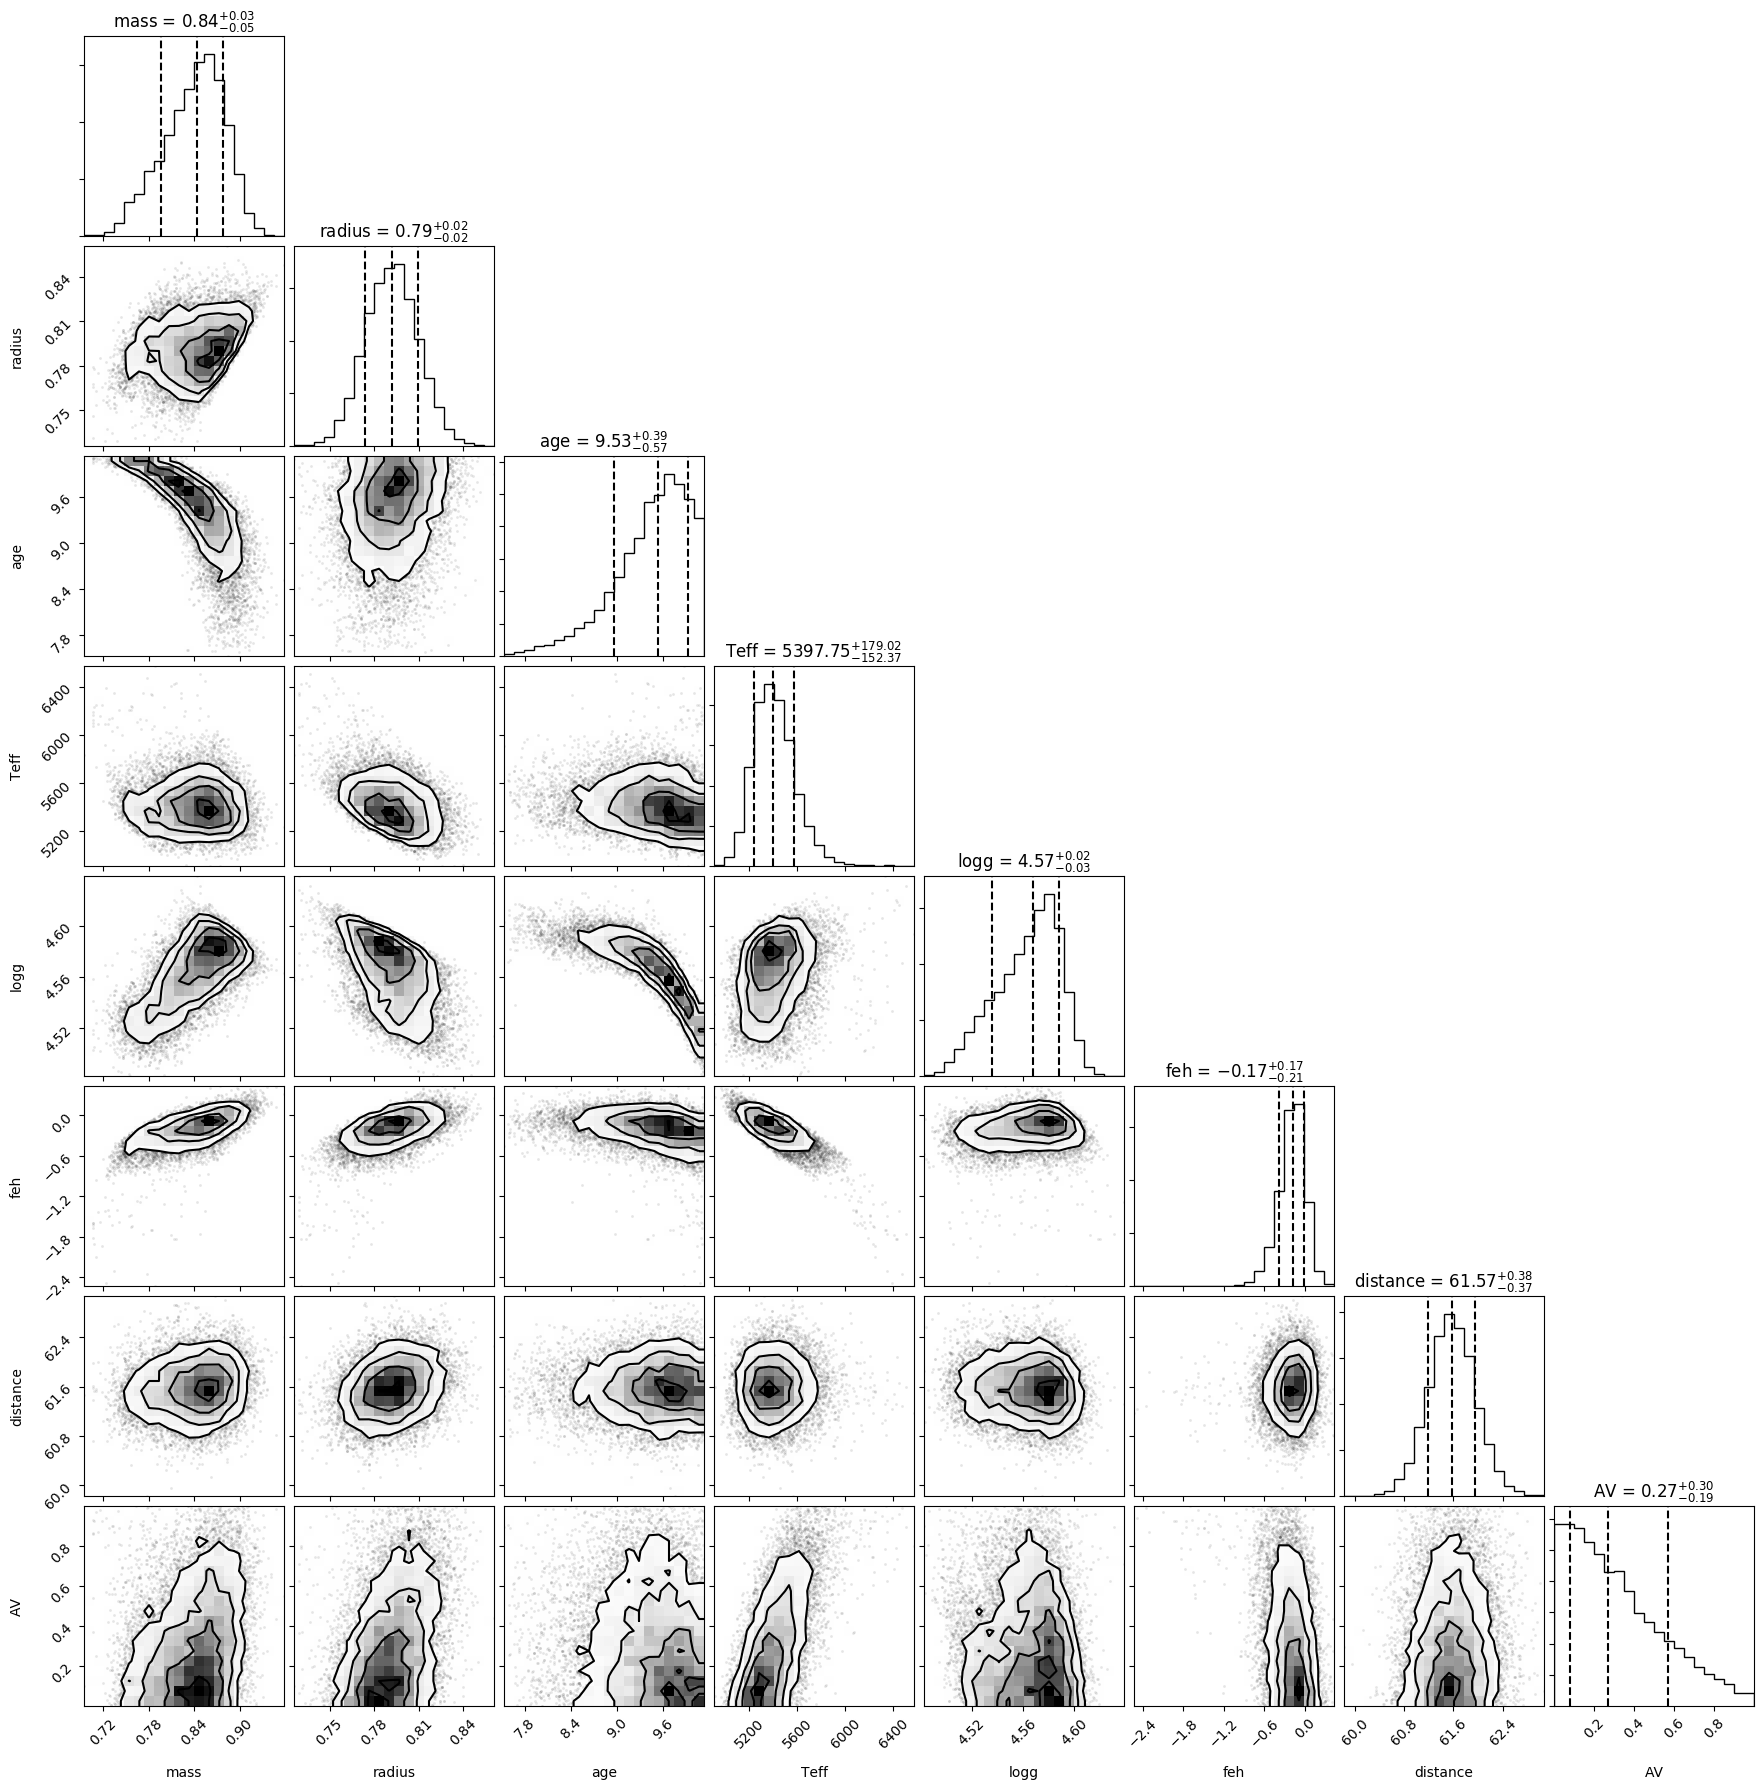

In [7]:
fig = star.plot_corner(use_isochrones=True, posterior='physical')

In [8]:
star.get_isochrones_results()

eep       age       feh      mass  initial_mass    radius  \
0      359.650635  9.985027 -0.121233  0.813510      0.813650  0.824837   
1      352.750238  9.835313 -1.281804  0.768198      0.768347  0.762671   
2      342.351012  9.758451 -0.580667  0.777416      0.777508  0.751017   
3      292.081350  8.940680 -0.179023  0.880546      0.880564  0.794477   
4      338.048129  9.684168 -0.336503  0.809132      0.809209  0.772132   
...           ...       ...       ...       ...           ...       ...   
11596  346.007063  9.833111 -0.147798  0.818486      0.818586  0.798341   
11597  346.007063  9.833111 -0.147798  0.818486      0.818586  0.798341   
11598  349.477692  9.899281 -0.119052  0.814310      0.814422  0.804134   
11599  349.477692  9.899281 -0.119052  0.814310      0.814422  0.804134   
11600  349.856547  9.924524 -0.116839  0.804040      0.804151  0.795650   

        density   logTeff         Teff      logg  ...     BP_mag    RP_mag  \
0      2.047506  3.721084  5262.157524  4.513182  ...  10.469562  9.295711   
1      2.446543  3.787403  6129.629769  4.557876  ...  10.290154  9.218698   
2      2.591212  3.745293  5563.365599  4.574459  ...  10.025384  9.056260   
3      2.481775  3.745140  5561.296993  4.582770  ...  10.341136  9.226243   
4      2.481622  3.737181  5460.499802  4.569088  ...   9.971639  8.999721   
...         ...       ...          ...       ...  ...        ...       ...   
11596  2.273067  3.723257  5288.619677  4.544674  ...  10.063960  9.057564   
11597  2.273067  3.723257  5288.619677  4.544674  ...  10.063960  9.057564   
11598  2.211467  3.719217  5239.358471  4.535732  ...  10.080230  9.064851   
11599  2.211467  3.719217  5239.358471  4.535732  ...  10.080230  9.064851   
11600  2.255638  3.715040  5189.528116  4.539355  ...  10.146642  9.117546   

         W1_mag    W2_mag    W3_mag  TESS_mag  Kepler_mag   parallax  \
0      7.831141  7.855675  7.787305  9.279927    9.865500  15.892917   
1      7.857204  7.828680  7.786178  9.201309    9.761883  16.044399   
2      7.855504  7.859506  7.819351  9.045464    9.538108  16.715670   
3      7.856623  7.865350  7.810721  9.211170    9.773384  15.872641   
4      7.811298  7.828479  7.782111  8.989726    9.478025  16.681350   
...         ...       ...       ...       ...         ...        ...   
11596  7.831385  7.863246  7.806866  9.047742    9.546882  16.204684   
11597  7.831385  7.863246  7.806866  9.047742    9.546882  16.204684   
11598  7.826682  7.861997  7.803144  9.055076    9.557239  16.188733   
11599  7.826682  7.861997  7.803144  9.055076    9.557239  16.188733   
11600  7.856963  7.894542  7.833423  9.107582    9.615684  16.214643   

        distance        AV  
0      62.921113  0.516062  
1      62.327047  0.912019  
2      59.824106  0.296501  
3      63.001486  0.615358  
4      59.947186  0.208554  
...          ...       ...  
11596  61.710551  0.130513  
11597  61.710551  0.130513  
11598  61.771355  0.106478  
11599  61.771355  0.106478  
11600  61.672650  0.093012  

[11601 rows x 30 columns]

## stardate

In [9]:
star.run_stardate(iso_params=iso_params, nsteps=1000)

Input parameters:
{'Av': [0.305956668779254, 0.01],
 'H': [7.997, 0.036],
 'J': [8.352, 0.027],
 'K': [7.858, 0.036],
 'parallax': [16.25231096261722, 0.1035314124863975]}
Init isochrones parameters:
{'Av': 0.0045,
 'EEP': 329.58,
 '[Fe/H]': -0.0478,
 'ln(Distance)': 5.560681631015528,
 'log10(Age [yr])': 9.5596}


100%|██████████| 5000/5000 [00:46<00:00, 107.57it/s]

nsteps 5000 burnin 500


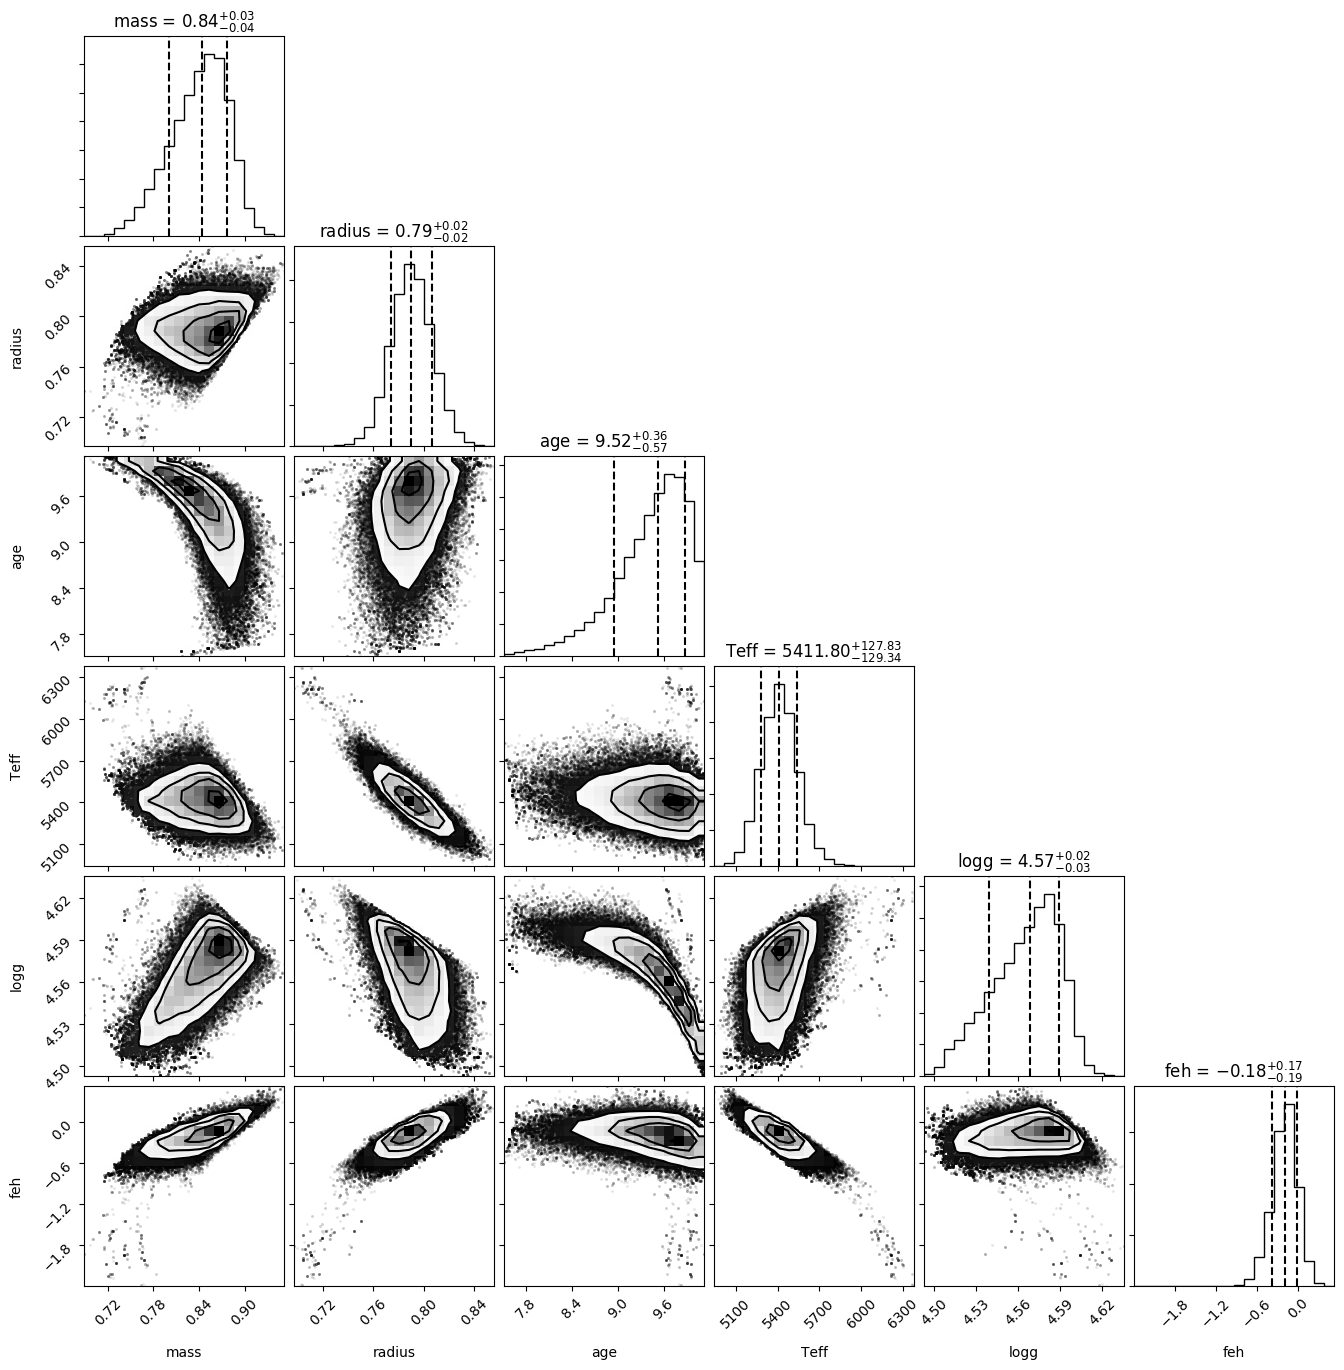

In [10]:
fig = star.plot_corner(use_isochrones=False)

# extinction

In [11]:
star.estimate_Av(map='sfd')

0.305956668779254

In [12]:
star.estimate_Av(map='planck')

0.3179775469005108

# spectral type

In [13]:
#uses Monte Carlo 
spec_types, samples = star.get_spectral_type(return_samples=True)
spec_types

Loaded: /home/jp/github/research/project/chronos/chronos/data/mamajek_table.csv


'G9V'

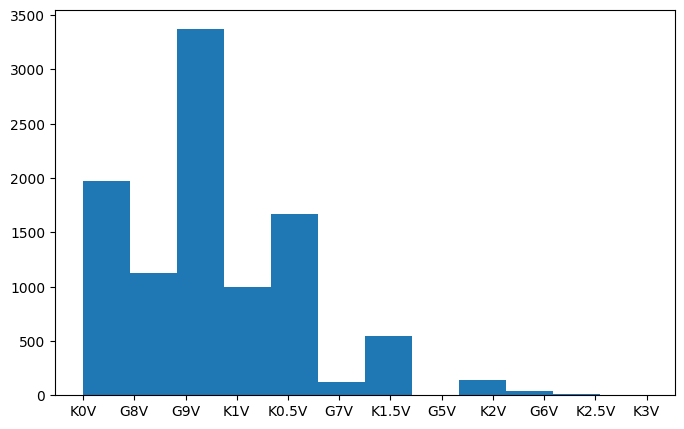

In [14]:
import matplotlib.pyplot as pl

#plot
fig = pl.figure(figsize=(8,5))
nbins= len(np.unique(samples))
pl.hist(samples, bins=nbins);

# stellar inclination 

In [18]:
star.get_star_inclination(Prot=1, vsini=10, Rstar=0.8)

14.30426021645046

# See also
* examples-star-isochrones.ipynb